In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.linear_model
mnk = sklearn.linear_model.LinearRegression()

In [14]:
temp = pd.read_csv("pmsm_temperature_data.csv")
temp.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [15]:
id_map = {}
for i, elem in enumerate(temp.profile_id.unique()):
    id_map[elem] = i
inv_idmap = {v: k for k, v in id_map.items()}    
print(id_map)

{4: 0, 6: 1, 10: 2, 11: 3, 20: 4, 27: 5, 29: 6, 30: 7, 31: 8, 32: 9, 36: 10, 41: 11, 42: 12, 43: 13, 44: 14, 45: 15, 46: 16, 47: 17, 48: 18, 49: 19, 50: 20, 51: 21, 52: 22, 53: 23, 54: 24, 55: 25, 56: 26, 57: 27, 58: 28, 59: 29, 60: 30, 61: 31, 62: 32, 63: 33, 64: 34, 65: 35, 66: 36, 67: 37, 68: 38, 69: 39, 70: 40, 71: 41, 73: 42, 74: 43, 75: 44, 76: 45, 77: 46, 78: 47, 79: 48, 80: 49, 81: 50, 72: 51}


In [16]:
temp.profile_id = temp.profile_id.apply(lambda x: id_map[x])

In [17]:
temp.profile_id

0          0
1          0
2          0
3          0
4          0
          ..
998065    51
998066    51
998067    51
998068    51
998069    51
Name: profile_id, Length: 998070, dtype: int64

In [18]:
temp.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [19]:
len(temp.columns)

13

In [20]:
temp.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,24.654371
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,15.939251
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,0.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,9.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,26.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,38.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,51.000000


In [21]:
temp.iloc[:, 0:13].describe().round(2).T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
ambient,-0.00,0.99,-8.57,-0.60,0.27,0.69,2.97
coolant,0.00,1.00,-1.43,-1.04,-0.18,0.65,2.65
u_d,0.00,1.00,-1.66,-0.83,0.27,0.36,2.27
u_q,-0.01,1.00,-1.86,-0.93,-0.10,0.85,1.79
motor_speed,-0.01,1.00,-1.37,-0.95,-0.14,0.85,2.02
torque,-0.00,1.00,-3.35,-0.27,-0.19,0.55,3.02
i_d,0.01,1.00,-3.25,-0.76,0.21,1.01,1.06
i_q,-0.00,1.00,-3.34,-0.26,-0.19,0.50,2.91
pm,-0.00,1.00,-2.63,-0.67,0.09,0.68,2.92
stator_yoke,0.00,1.00,-1.83,-0.75,-0.06,0.70,2.45


In [22]:
temp.dtypes.value_counts()

float64    12
int64       1
dtype: int64

In [90]:
#tylko dla id  4
temp1 = temp.iloc[:, :12]

In [91]:
temp1.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [92]:
temp1.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781


In [93]:
corr_temp = temp1.corr()

In [94]:
corr_temp.shape

(12, 12)

In [95]:
corr_temp

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
ambient,1.000000,0.434435,0.194754,0.087430,0.078283,-0.262264,0.005605,-0.260562,0.501496,0.451616,0.396742,0.301883
coolant,0.434435,1.000000,0.178708,0.027851,-0.033332,-0.189617,0.108489,-0.186060,0.430548,0.874037,0.689003,0.509298
u_d,0.194754,0.178708,1.000000,-0.027472,-0.233828,-0.821325,0.358517,-0.796586,-0.082564,0.041428,-0.066256,-0.150714
u_q,0.087430,0.027851,-0.027472,1.000000,0.716897,-0.037262,-0.181855,-0.026348,0.101236,0.106186,0.149017,0.125445
motor_speed,0.078283,-0.033332,-0.233828,0.716897,1.000000,0.024517,-0.722914,0.006323,0.332419,0.182564,0.333909,0.393154
torque,-0.262264,-0.189617,-0.821325,-0.037262,0.024517,1.000000,-0.239059,0.996560,-0.072905,-0.092207,-0.011055,0.080981
i_d,0.005605,0.108489,0.358517,-0.181855,-0.722914,-0.239059,1.000000,-0.204230,-0.299227,-0.179903,-0.387712,-0.539924
i_q,-0.260562,-0.186060,-0.796586,-0.026348,0.006323,0.996560,-0.204230,1.000000,-0.086486,-0.098753,-0.025191,0.060949
pm,0.501496,0.430548,-0.082564,0.101236,0.332419,-0.072905,-0.299227,-0.086486,1.000000,0.695014,0.768352,0.729561
stator_yoke,0.451616,0.874037,0.041428,0.106186,0.182564,-0.092207,-0.179903,-0.098753,0.695014,1.000000,0.949898,0.845144


In [96]:
corr_temp_tri = corr_temp.where(np.triu(np.ones(corr_temp.shape, dtype=np.bool), k=1)).stack().sort_values()

In [97]:
corr_temp_tri[abs(corr_temp_tri)>0.5]

u_d           torque           -0.821325
              i_q              -0.796586
motor_speed   i_d              -0.722914
i_d           stator_winding   -0.539924
ambient       pm                0.501496
coolant       stator_winding    0.509298
              stator_tooth      0.689003
pm            stator_yoke       0.695014
u_q           motor_speed       0.716897
pm            stator_winding    0.729561
              stator_tooth      0.768352
stator_yoke   stator_winding    0.845144
coolant       stator_yoke       0.874037
stator_yoke   stator_tooth      0.949898
stator_tooth  stator_winding    0.965633
torque        i_q               0.996560
dtype: float64

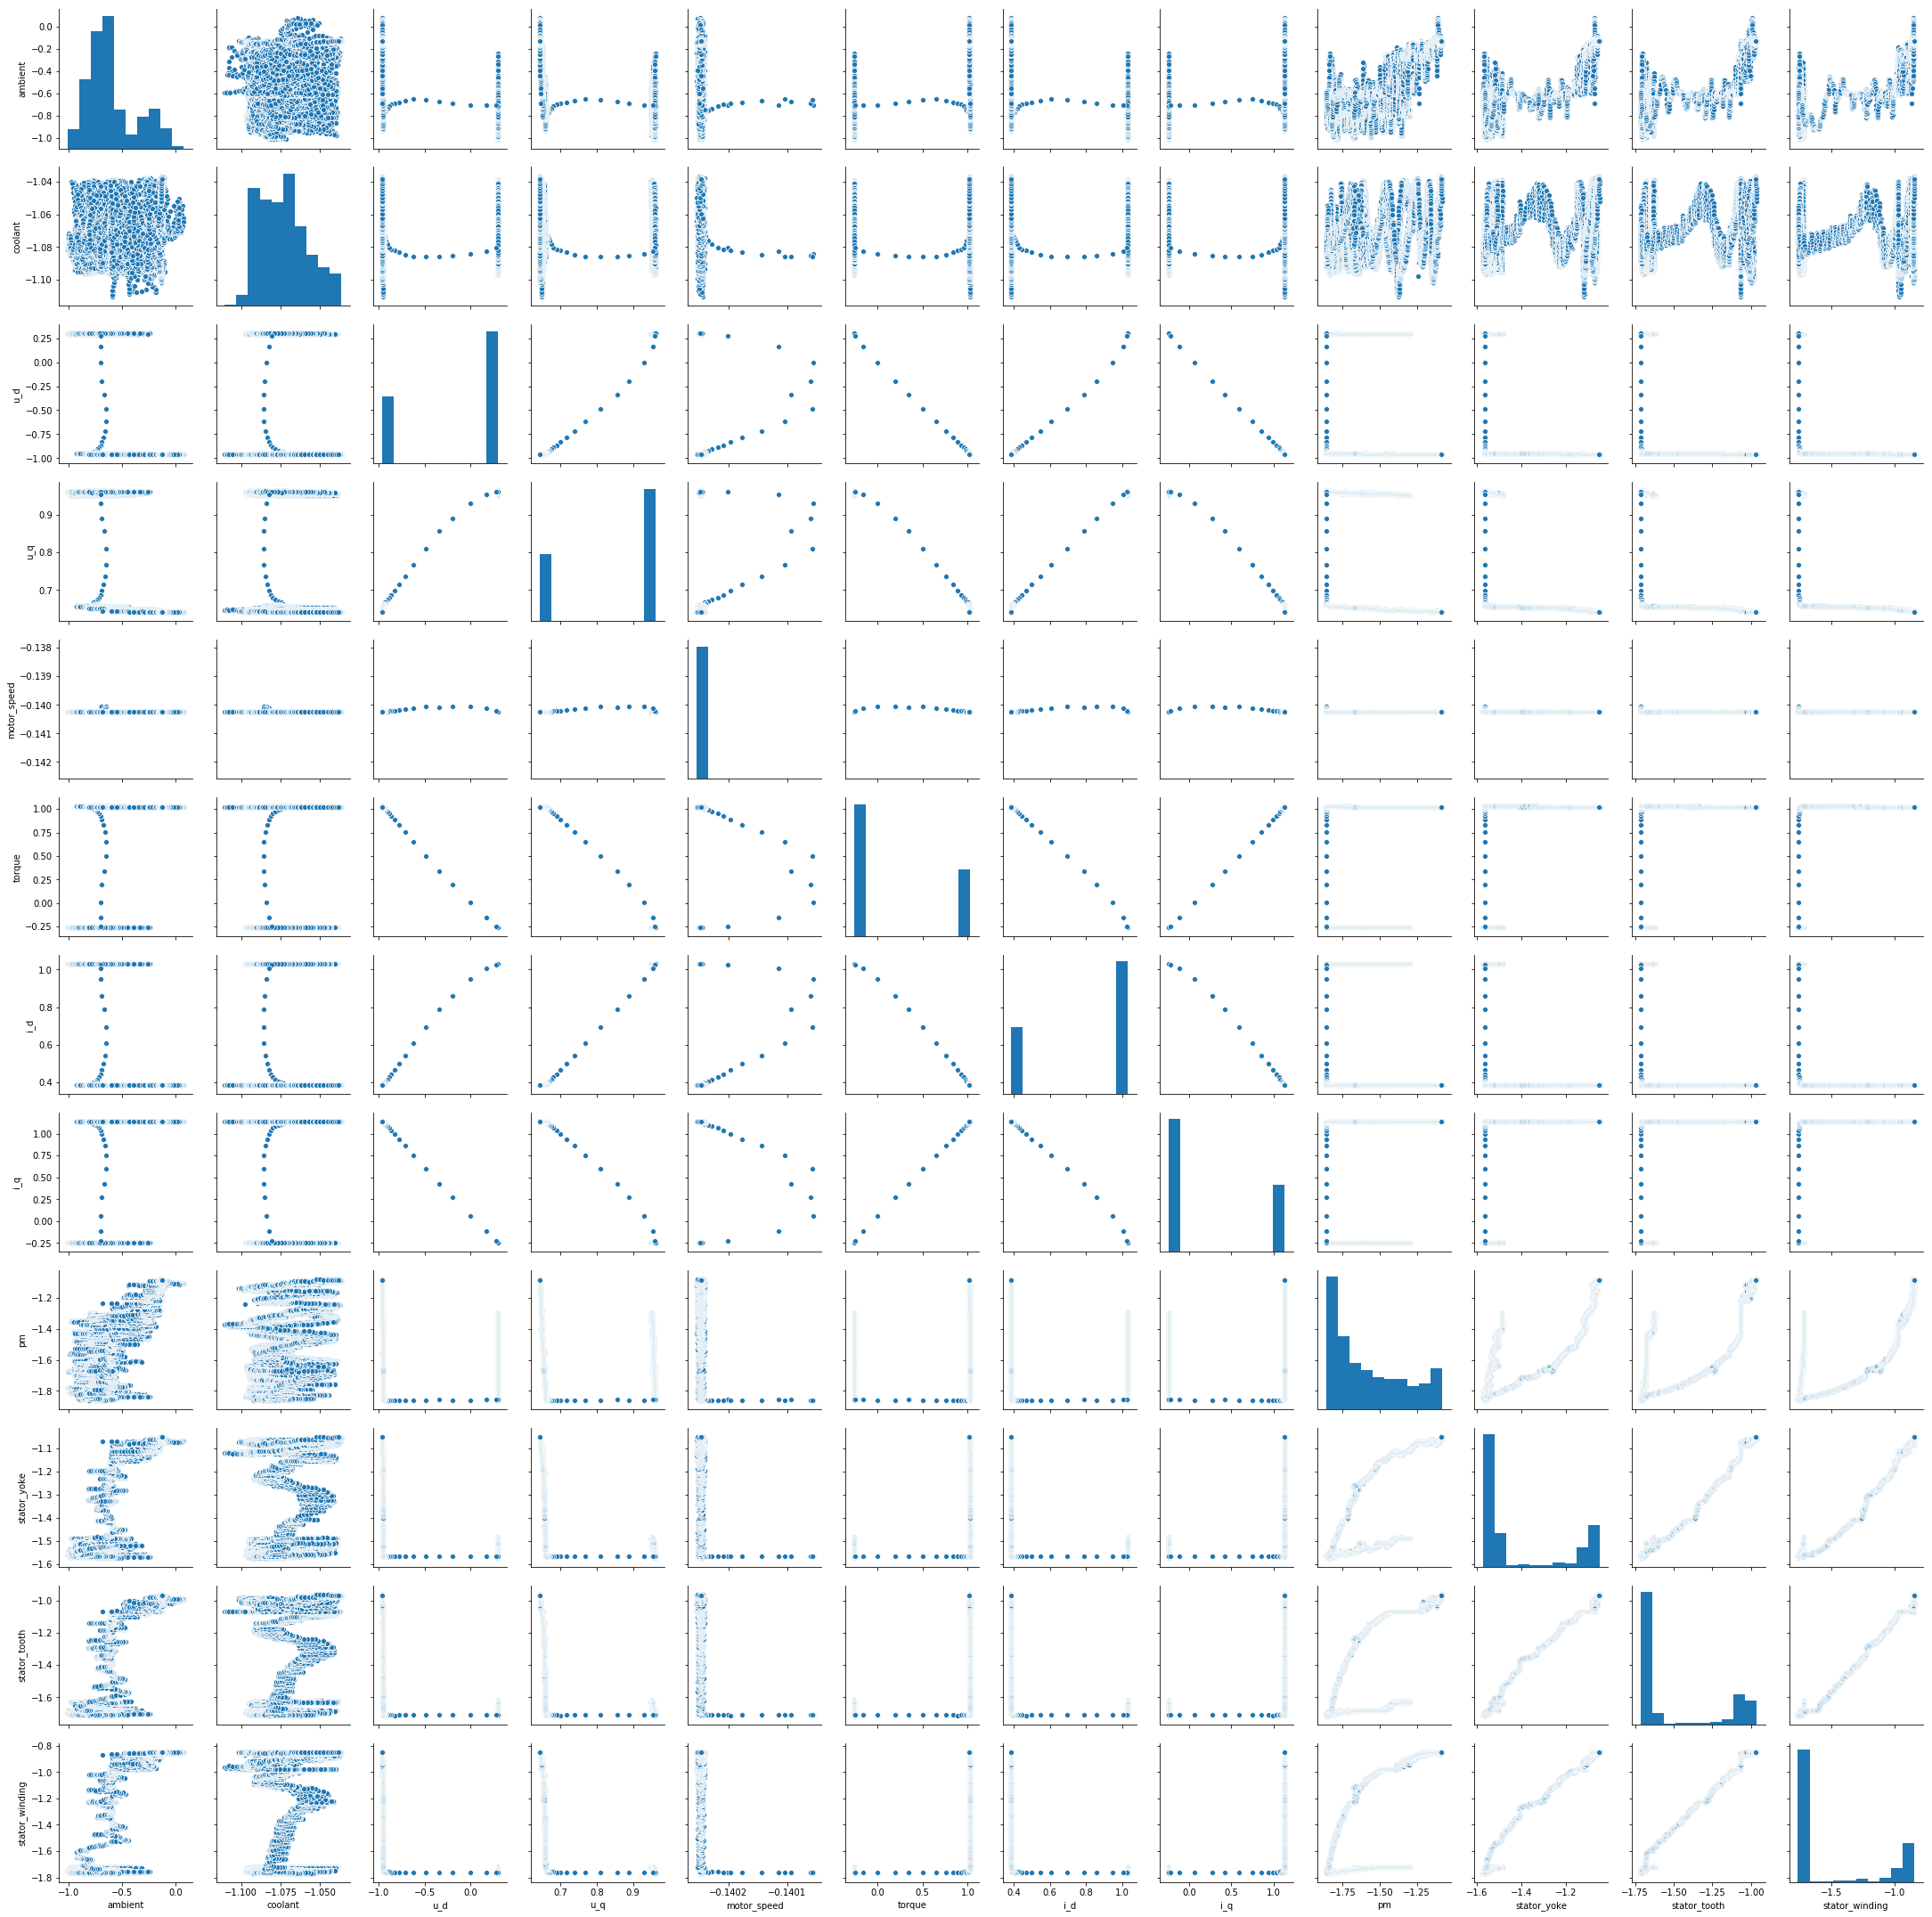

In [98]:
sns.pairplot(temp1.iloc[10000:20000, :])
plt.show()

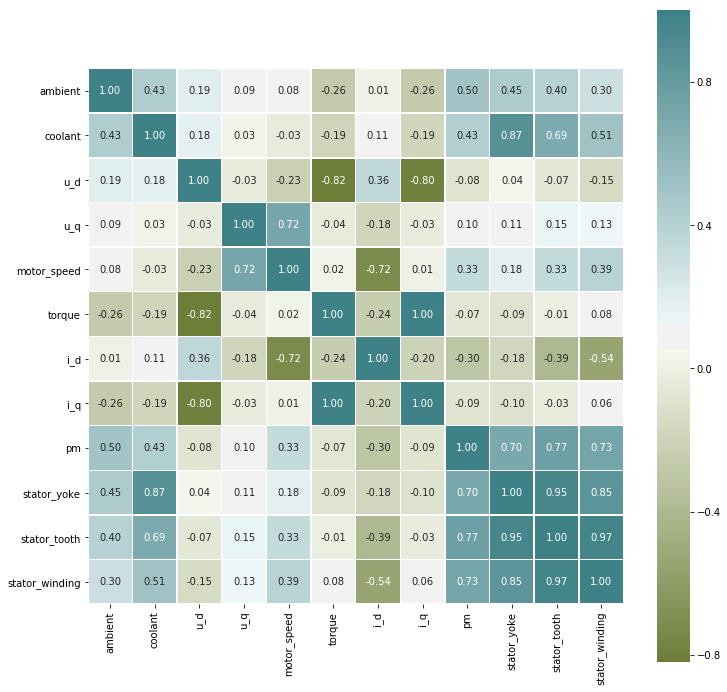

In [99]:
f,ax=plt.subplots(figsize=(12,12))

sns.heatmap(corr_temp, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(corr_temp,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

In [23]:
y = temp.iloc[:,(8) & (-1)]

In [24]:
y.head()

0   -2.522071
1   -2.522418
2   -2.522673
3   -2.521639
4   -2.521900
Name: pm, dtype: float64

In [26]:
x = temp.drop(['pm'], axis=1)

In [27]:
x.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033,0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-1.830969,-2.064859,-2.017631,0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343,0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-1.830333,-2.063137,-2.017632,0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-1.830498,-2.062795,-2.018145,0


In [28]:
mnk.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
mnk.intercept_

0.08781072265330192

In [30]:
mnk.coef_

array([ 2.32236384e-01, -2.37998259e-01, -2.32366445e-02, -3.51088740e-01,
        3.35062249e-01,  6.66531844e-02,  1.82083703e-01, -4.88230638e-02,
       -1.55148497e+00,  4.51277638e+00, -2.25610152e+00, -3.60757695e-03])

In [31]:
x_new = x.mean().values.reshape(1,-1)

In [32]:
x_new

array([[-3.90549208e-03,  4.72251019e-03,  4.78041829e-03,
        -5.68972252e-03, -6.33550799e-03, -3.33285043e-03,
         6.04297096e-03, -3.19401557e-03,  6.09140300e-04,
        -2.20773772e-03, -3.93476002e-03,  2.46543709e+01]])

In [33]:
mnk.predict(x_new)

array([-0.00439579])

In [111]:
x_std = (x-x.mean(axis=0))/x.std(axis=0)

In [112]:
x_std.describe()

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_tooth,stator_winding
count,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05,9.980700e+05
mean,-3.610023e-13,2.148898e-13,-6.967515e-15,5.266386e-16,-2.328349e-14,-2.871728e-15,1.645897e-14,9.074060e-16,7.215621e-14,-1.842094e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.629360e+00,-1.430605e+00,-1.663684e+00,-1.851459e+00,-1.363518e+00,-3.255190e+00,-3.345430e+00,-2.638979e+00,-2.064766e+00,-2.019385e+00
25%,-5.996010e-01,-1.040127e+00,-8.329064e-01,-9.195573e-01,-9.443952e-01,-7.631066e-01,-2.546065e-01,-6.708054e-01,-7.600490e-01,-7.228850e-01
50%,2.719318e-01,-1.814696e-01,2.633205e-01,-9.390934e-02,-1.337458e-01,2.081014e-01,-1.872726e-01,9.919084e-02,7.295647e-03,1.048858e-02
75%,6.953601e-01,6.444247e-01,3.544627e-01,8.563197e-01,8.588634e-01,1.008947e+00,5.035053e-01,6.880553e-01,7.747588e-01,7.308063e-01
max,2.991584e+00,2.637917e+00,2.274781e+00,1.795005e+00,2.028006e+00,1.055956e+00,2.923482e+00,2.934511e+00,2.329814e+00,2.662128e+00


In [113]:
mnk_std = sklearn.linear_model.LinearRegression()

In [114]:
mnk_std.fit(x_std, (y-y.mean())/y.std())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
pd.Series(mnk_std.coef_, index=x.columns.to_list()).round(4)

ambient          -0.0002
coolant           0.2799
u_d               0.0083
u_q               0.0132
motor_speed      -0.0562
i_d              -0.0209
i_q               0.0099
pm               -0.0169
stator_tooth      1.1802
stator_winding   -0.4149
dtype: float64

In [34]:
y_pred = mnk.predict(x)

In [35]:
y_pred[0:10]

array([-1.52915672, -1.52979334, -1.52921215, -1.52325081, -1.51849149,
       -1.51327654, -1.50850936, -1.50619984, -1.50739215, -1.5051762 ])

In [36]:
y[0:10]

0   -2.522071
1   -2.522418
2   -2.522673
3   -2.521639
4   -2.521900
5   -2.522203
6   -2.522538
7   -2.522844
8   -2.522808
9   -2.522677
Name: pm, dtype: float64

In [37]:
mnk.score(x,y)

0.7743175360640316

In [38]:
sklearn.metrics.r2_score(y, y_pred)

0.7743175360640316

In [39]:
ranges = [
    (0,13),
    (13,26),
    (26,39),
    (39,52)
]

In [50]:
lista_wynik = pd.DataFrame()
for i in range(4):
    start, stop = ranges[i]
    temp_test = temp[(temp.profile_id>=start) & (temp.profile_id<stop)]
    temp_ucz = temp[(temp.profile_id<start) | (temp.profile_id>=stop)]
    
    y_ucz = temp_ucz.iloc[:, 8]
    y_test = temp_test.pm
    x_ucz = temp_ucz.drop(['pm', 'profile_id'], axis=1)
    x_test = temp_test.drop(['pm', 'profile_id'], axis=1)
    
    params = ["Reg. liniowa"]
    res = [fit_regression(x_ucz, x_test, y_ucz, y_test)]
    lista_wynik = lista_wynik.append(pd.DataFrame(res, index=[i]))
    
print(x_test.shape)
print(x_ucz.shape)
print(y_ucz.shape)
print(y_test.shape)

(242895, 11)
(755175, 11)
(755175,)
(242895,)


In [48]:
def fit_regression(x_ucz, x_test, y_ucz, y_test):
    r = sklearn.linear_model.LinearRegression()
    r.fit(x_ucz, y_ucz)
    y_ucz_pred = r.predict(x_ucz)
    y_test_pred = r.predict(x_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred)
    }

In [123]:
params = ["Reg. liniowa"]
res = [fit_regression(x_ucz, x_test, y_ucz, y_test)]
pd.DataFrame(res, index=params)

,r_score_u,r_score_t,MSE_u,MSE_t,MAE_u,MAE_t
Reg. liniowa,0.997534,0.997543,0.002472,0.002461,0.034586,0.034374


In [124]:
y_std = (y-y.mean())/y.std()

In [125]:
y_std.describe()

count    9.980700e+05
mean    -1.226009e-13
std      1.000000e+00
min     -1.833373e+00
25%     -7.470907e-01
50%     -5.777421e-02
75%      6.960048e-01
max      2.445983e+00
Name: stator_yoke, dtype: float64

In [126]:
params = ["Reg. liniowa"]
res = [fit_regression(x_ucz, x_test, y_ucz, y_test)]
pd.DataFrame(res, index=params)

,r_score_u,r_score_t,MSE_u,MSE_t,MAE_u,MAE_t
Reg. liniowa,0.997534,0.997543,0.002472,0.002461,0.034586,0.034374


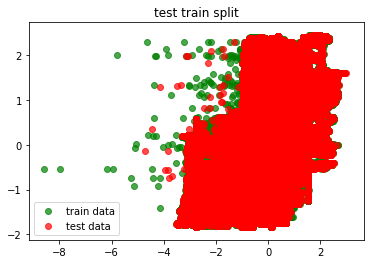

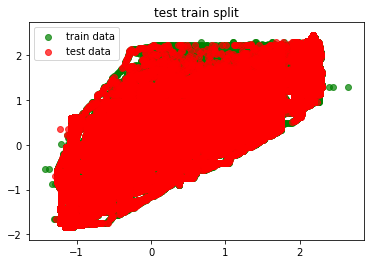

KeyboardInterrupt: 

In [128]:
for i in range(11):  
    plt.scatter(x_ucz.iloc[:, i], y_ucz, label='train data', color='g', alpha = .7)
    plt.scatter(x_test.iloc[:, i], y_test, label='test data', color='r', alpha = .7)
    plt.legend()
    plt.title("test train split")
    plt.show()

In [1]:
temp.profile_id.unique()

NameError: name 'temp' is not defined

In [51]:
lista_wynik

,r_score_u,r_score_t,MSE_u,MSE_t,MAE_u,MAE_t
0,0.727196,0.732732,0.191293,0.400544,0.341521,0.482906
1,0.777489,0.697412,0.241444,0.150787,0.374861,0.307588
2,0.768477,0.760496,0.234852,0.211617,0.367127,0.364103
3,0.805749,0.568077,0.214880,0.269781,0.346823,0.409522


In [52]:
lista_wynik.describe()

,r_score_u,r_score_t,MSE_u,MSE_t,MAE_u,MAE_t
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.769728,0.689679,0.220617,0.258182,0.357583,0.391030
std,0.032497,0.085079,0.022577,0.106620,0.015952,0.074096
min,0.727196,0.568077,0.191293,0.150787,0.341521,0.307588
25%,0.758157,0.665078,0.208983,0.196410,0.345497,0.349975
50%,0.772983,0.715072,0.224866,0.240699,0.356975,0.386813
75%,0.784554,0.739673,0.236500,0.302472,0.369060,0.427868
max,0.805749,0.760496,0.241444,0.400544,0.374861,0.482906
